Import libs e overall data



In [1]:
#import data 

import os
import tarfile
import urllib

download_root = 'https://raw.githubusercontent.com/ageron/handson-m12/master/'
housing_Path = os.path.join('datasets', 'housing')
housing_url = download_root + 'datasets/housing/housing.tgz'

In [2]:
def fetch_housing_data(housing_url=housing_url, housing_path=housing_Path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [3]:
import pandas as pd

def load_housing_data(housing_path=housing_Path):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [4]:
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/marcelosilva/Desktop/Hands-on/data/raw/housing/housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Describe the dataset


In [5]:
import pandas_utils as pdu

pdu.custom_info(df)

DataFrame Info with Completeness Analysis:
---------------------------------------------------------------------------
Total Rows: 20640
Total Columns: 10

Column Details:
---------------------------------------------------------------------------
longitude               20640 non-null float64    (100.0% complete)
latitude                20640 non-null float64    (100.0% complete)
housing_median_age      20640 non-null float64    (100.0% complete)
total_rooms             20640 non-null float64    (100.0% complete)
total_bedrooms          20433 non-null float64    (99.0% complete) •
population              20640 non-null float64    (100.0% complete)
households              20640 non-null float64    (100.0% complete)
median_income           20640 non-null float64    (100.0% complete)
median_house_value      20640 non-null float64    (100.0% complete)
ocean_proximity         20640 non-null object     (100.0% complete)

Memory Usage: 1612.6+ KB


# Dataset Overview and Assessment

## Data Structure Analysis
The dataset contains **20,640 entries** with **10 columns** representing California housing market data:

### Key Observations:
- **Missing Values**: Only `total_bedrooms` has missing data (207 missing values out of 20,640)
- **Data Types**: 9 numerical columns (float64) and 1 categorical column (object)
- **Memory Usage**: Efficient storage at 1.6+ MB

### Column Analysis:
1. **Geographic Features**: `longitude`, `latitude` - Precise location data
2. **Property Characteristics**: 
   - `housing_median_age` - Age of housing units
   - `total_rooms`, `total_bedrooms` - Room counts
   - `households` - Number of households
3. **Demographic Features**: `population` - Area population
4. **Economic Indicators**: `median_income`, `median_house_value` - Key target variables
5. **Categorical Feature**: `ocean_proximity` - Location relative to ocean

### Data Quality Assessment:
- **Completeness**: 99% complete (only 1% missing in total_bedrooms)
- **Consistency**: All numerical features are float64, appropriate for housing data
- **Relevance**: All features appear relevant for housing price prediction

### Recommendations:
1. Handle missing values in `total_bedrooms` (imputation strategy needed)
2. Consider feature engineering (e.g., rooms per household, bedrooms per room)
3. Analyze `ocean_proximity` categories for encoding strategy
4. Check for outliers in numerical features, especially price and income


In [6]:
pdu.custom_describe(df)




Enhanced DataFrame Description (Numeric Columns Only):
           longitude    latitude  housing_median_age   total_rooms  \
count     20640.0000  20640.0000          20640.0000  2.064000e+04   
mean       -119.5697     35.6319             28.6395  2.635763e+03   
median     -118.4900     34.2600             29.0000  2.127000e+03   
mode       -118.3100     34.0600             52.0000  1.527000e+03   
std           2.0035      2.1360             12.5856  2.181615e+03   
variance      4.0141      4.5623            158.3963  4.759445e+06   
min        -124.3500     32.5400              1.0000  2.000000e+00   
25%        -121.8000     33.9300             18.0000  1.447750e+03   
50%        -118.4900     34.2600             29.0000  2.127000e+03   
75%        -118.0100     37.7100             37.0000  3.148000e+03   
max        -114.3100     41.9500             52.0000  3.932000e+04   
range        10.0400      9.4100             51.0000  3.931800e+04   
skewness     -0.2978      0.4660   

In [7]:
pdu.full_analysis(df, save_to='analise_housing.csv')

🔍 FULL DATAFRAME ANALYSIS
📊 Total Rows: 20,640 | Total Columns: 10 (9 numeric, 1 categorical, 0 other) | Memory: 2.70 MB

📊 INTEGRATED STATISTICS (Numeric Columns):
             longitude   latitude housing_median_age     total_rooms  \
total_rows       20640      20640              20640           20640   
non_null         20640      20640              20640           20640   
complete_%       100.0      100.0              100.0           100.0   
dtype          float64    float64            float64         float64   
count            20640      20640              20640           20640   
mean       -119.569704  35.631861          28.639486     2635.763081   
median         -118.49      34.26               29.0          2127.0   
mode           -118.31      34.06               52.0          1527.0   
std           2.003532   2.135952          12.585558     2181.615252   
variance      4.014139   4.562293          158.39626  4759445.105939   
min            -124.35      32.54          

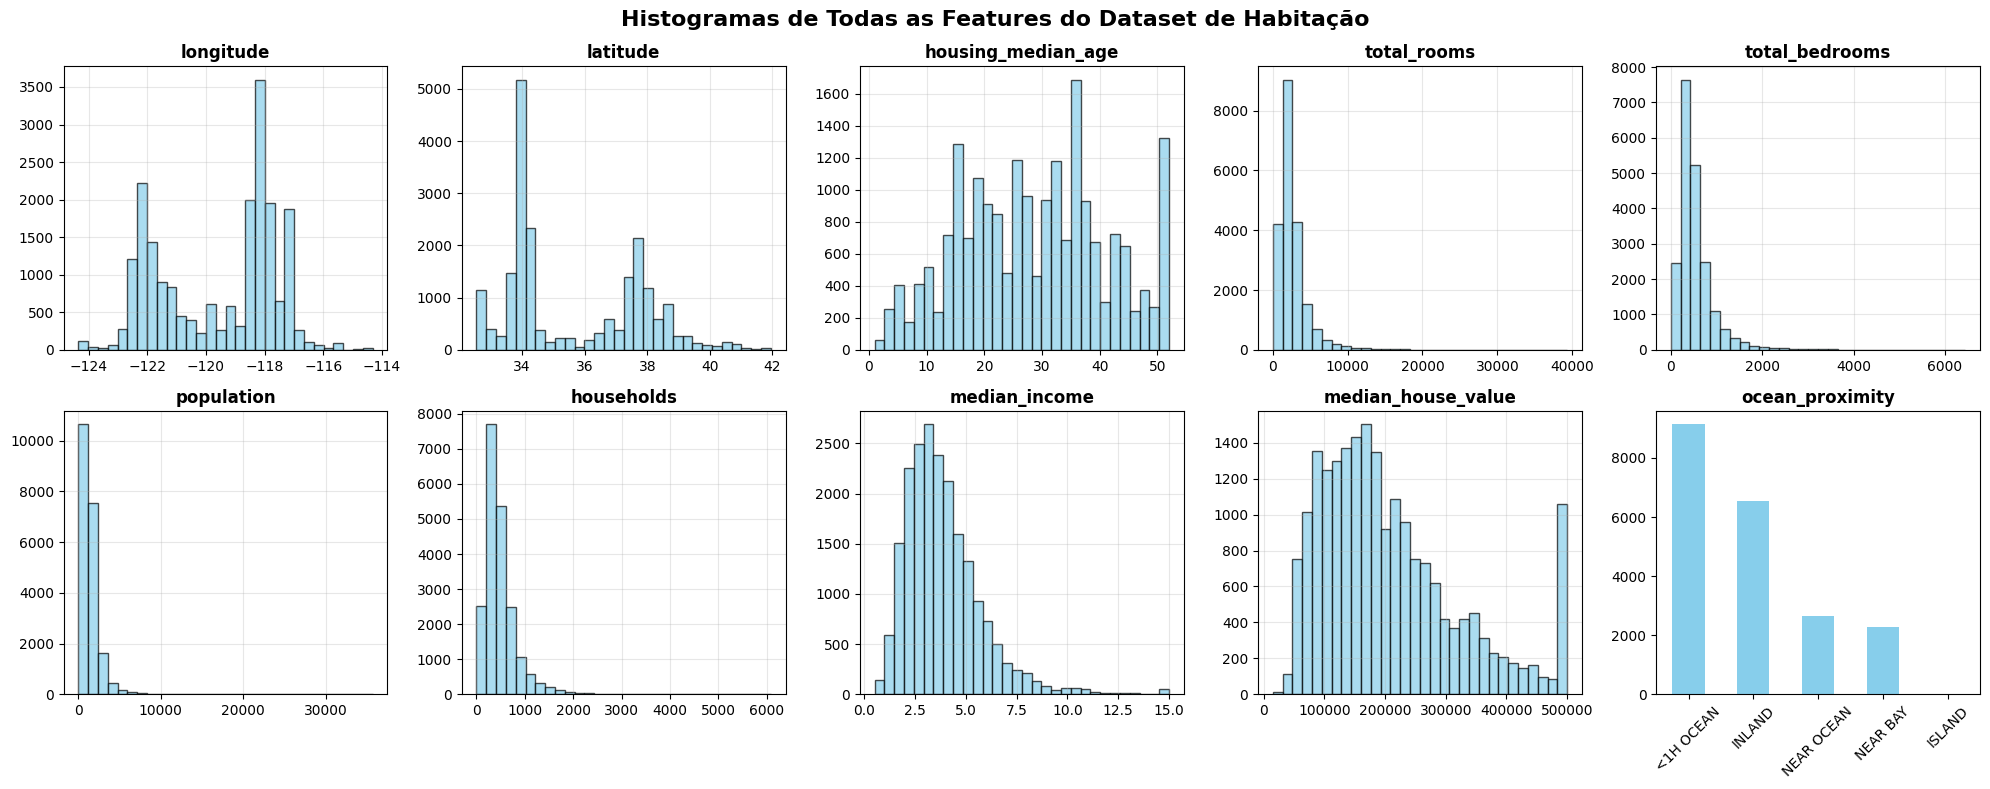


RESUMO ESTATÍSTICO DAS FEATURES

LONGITUDE:
  Média: -119.57
  Mediana: -118.49
  Desvio Padrão: 2.00
  Valores únicos: 844
  Valores nulos: 0

LATITUDE:
  Média: 35.63
  Mediana: 34.26
  Desvio Padrão: 2.14
  Valores únicos: 862
  Valores nulos: 0

HOUSING_MEDIAN_AGE:
  Média: 28.64
  Mediana: 29.00
  Desvio Padrão: 12.59
  Valores únicos: 52
  Valores nulos: 0

TOTAL_ROOMS:
  Média: 2635.76
  Mediana: 2127.00
  Desvio Padrão: 2181.62
  Valores únicos: 5926
  Valores nulos: 0

TOTAL_BEDROOMS:
  Média: 537.87
  Mediana: 435.00
  Desvio Padrão: 421.39
  Valores únicos: 1923
  Valores nulos: 207

POPULATION:
  Média: 1425.48
  Mediana: 1166.00
  Desvio Padrão: 1132.46
  Valores únicos: 3888
  Valores nulos: 0

HOUSEHOLDS:
  Média: 499.54
  Mediana: 409.00
  Desvio Padrão: 382.33
  Valores únicos: 1815
  Valores nulos: 0

MEDIAN_INCOME:
  Média: 3.87
  Mediana: 3.53
  Desvio Padrão: 1.90
  Valores únicos: 12928
  Valores nulos: 0

MEDIAN_HOUSE_VALUE:
  Média: 206855.82
  Mediana: 179700.

In [8]:
import matplotlib.pyplot as plt

# Configurar o estilo do matplotlib
plt.style.use('default')

# Criar subplots para todas as features
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Histogramas de Todas as Features do Dataset de Habitação', fontsize=16, fontweight='bold')

# Lista de features para plotar
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
           'total_bedrooms', 'population', 'households', 'median_income', 
           'median_house_value', 'ocean_proximity']

# Plotar histogramas
for i, feature in enumerate(features):
    row = i // 5
    col = i % 5
    
    if feature == 'ocean_proximity':
        # Para feature categórica, usar value_counts
        df[feature].value_counts().plot(kind='bar', ax=axes[row, col], color='skyblue')
        axes[row, col].set_title(f'{feature}', fontweight='bold')
        axes[row, col].tick_params(axis='x', rotation=45)
    else:
        # Para features numéricas, usar histograma
        axes[row, col].hist(df[feature].dropna(), bins=30, color='skyblue', alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'{feature}', fontweight='bold')
        axes[row, col].grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()
plt.show()

# Mostrar estatísticas básicas para cada feature
print("\n" + "="*80)
print("RESUMO ESTATÍSTICO DAS FEATURES")
print("="*80)

for feature in features:
    if feature != 'ocean_proximity':
        print(f"\n{feature.upper()}:")
        print(f"  Média: {df[feature].mean():.2f}")
        print(f"  Mediana: {df[feature].median():.2f}")
        print(f"  Desvio Padrão: {df[feature].std():.2f}")
        print(f"  Valores únicos: {df[feature].nunique()}")
        print(f"  Valores nulos: {df[feature].isnull().sum()}")
    else:
        print(f"\n{feature.upper()}:")
        print(f"  Categorias: {df[feature].nunique()}")
        print(f"  Valores únicos: {df[feature].nunique()}")
        print(f"  Valores nulos: {df[feature].isnull().sum()}")
        print(f"  Distribuição:\n{df[feature].value_counts()}")


# Feature Distribution Analysis


1. **longitude & latitude**:
   - Both features show a multi-modal distribution, reflecting the geographic clustering of the data (California regions).
   - There are clear peaks, likely corresponding to major population centers.

2. **housing_median_age**:
   - The distribution is right-skewed, with a concentration of values at the higher end (around 50+ years).
   - This suggests many neighborhoods are relatively old, possibly due to established communities.

3. **total_rooms**:
   - Highly right-skewed with a long tail, indicating a few blocks have a very large number of rooms.
   - Most values are concentrated at the lower end, but outliers exist.

4. **total_bedrooms**:
   - Similar to total_rooms, this feature is also right-skewed.
   - The distribution suggests that while most blocks have a moderate number of bedrooms, some have exceptionally high counts.

5. **population**:
   - Strong right skew, with most blocks having a population below 5000, but a few with much higher populations.
   - Indicates a small number of densely populated areas.

6. **households**:
   - Again, right-skewed, mirroring the population distribution.
   - Most blocks have fewer than 1000 households, but some outliers exist.

7. **median_income**:
   - This feature is particularly interesting: it is left-skewed (peak on the right), with most values concentrated at the lower end (between 2 and 6).
   - There is a sharp drop-off after the peak, and very few blocks have high median incomes.
   - This could indicate income inequality or a cap in the data collection.

8. **median_house_value**:
   - The distribution is right-skewed, with a clear cap at $500,000, suggesting a possible upper limit in the dataset (censoring).
   - Many values cluster just below this cap, which could bias modeling.

9. **ocean_proximity**:
   - This categorical feature shows that most blocks are "<1H OCEAN" or "INLAND".
   - "ISLAND" is extremely rare, with only a handful of occurrences.
   - The distribution is highly imbalanced, which may affect models using this feature.

**Notable Observations:**
- Most numerical features are right-skewed, with a few extreme outliers.
- The "median_income" feature is left-skewed, which is unusual and may warrant further investigation.
- The "median_house_value" cap at $500,000 is a clear sign of censored data.
- "ocean_proximity" is highly imbalanced, and rare categories may need special handling.

**Potential Issues:**
- Outliers and skewness in features like total_rooms, population, and households could impact model performance.
- Missing values in "total_bedrooms" (as seen in the statistical summary) should be addressed.
- The cap in "median_house_value" could bias regression models and should be considered during modeling.

""")
